# IDS ML Algorithm Using NSL-KDD Dataset

In [1]:
#from tensorflow.python.framework import ops
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import Model, layers
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
def load_train_dataset():
    df = pd.read_csv('Datasets/csv_result-KDDTrain+.csv')
    df_test = pd.read_csv('Datasets/csv_result-KDDTest+.csv')
    
    data_set = pd.concat([df,df_test], axis=0,sort=False)
    
    data_set.drop(['num_outbound_cmds',
          'is_host_login',
          'urgent',
          'id'], axis = 'columns' , inplace = True)
    
    data_set['protocol_type'] = LabelEncoder().fit_transform(data_set['protocol_type'])
    data_set['flag'] = LabelEncoder().fit_transform(data_set['flag'])
    data_set['service'] = LabelEncoder().fit_transform(data_set['service'])
    
    data_set['class'] = data_set['class'].map( {'normal':0, 'anomaly':1} )
    
    limit = data_set.shape[1]-1
    
    X = data_set.iloc[:,0:limit]
    Y = data_set.iloc[:,limit]
    
    return X, Y, data_set

X, Y, data_set = load_train_dataset()
data_set

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
22540,0,1,24,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
22541,0,1,24,9,54540,8314,0,0,2,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
22542,0,2,12,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [5]:
X = X.values.reshape(X.shape[0],X.shape[1])
Y = Y.values.reshape(Y.shape[0],1)

print('Shape of X :',X.T.shape)
print('Shape of Y :',Y.T.shape)
print('# of training examples :',X.T.shape[1])

Shape of X : (38, 148517)
Shape of Y : (1, 148517)
# of training examples : 148517


In [6]:
train_X, test_X , train_Y , test_Y = train_test_split(X, Y, test_size=0.151794,shuffle=False)

print('Training X :',train_X.shape)
print('Test_X :',test_X.shape)
print('Training_Y :',train_Y.shape)
print('Test_Y :',test_Y.shape)

Training X : (125973, 38)
Test_X : (22544, 38)
Training_Y : (125973, 1)
Test_Y : (22544, 1)


In [7]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [8]:
train_X, val_X , train_Y , val_Y = train_test_split(train_X,train_Y, test_size=0.065,shuffle=False)

print('Training X   :',train_X.shape)
print('Validation X :',val_X.shape)
print('Test_X       :',test_X.shape)
print('Training_Y   :',train_Y.shape)
print('Validation Y :',val_Y.shape)
print('Test_Y       :',test_Y.shape)

Training X   : (117784, 38)
Validation X : (8189, 38)
Test_X       : (22544, 38)
Training_Y   : (117784, 1)
Validation Y : (8189, 1)
Test_Y       : (22544, 1)


In [14]:
#Neural Network Model
model = Sequential()
model.add(Dense(128, input_dim=38, activation='relu',kernel_initializer='glorot_uniform',
                bias_initializer='zeros',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               4992      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 71,169
Trainable params: 71,169
Non-trainable params: 0
__________________________________________________

In [15]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = METRICS)

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    verbose=1,
    patience=20,
    mode='min',
    restore_best_weights=True)

In [18]:
exe = model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=200,
                callbacks = [early_stopping], batch_size=256)

Train on 117784 samples, validate on 8189 samples
Epoch 1/200
117784/117784 [==============================] - 4s 32us/step - loss: 0.2572 - tp: 26007.5684 - fp: 670.6790 - tn: 30997.9941 - fn: 1459.2560 - accuracy: 0.9515 - precision: 0.9648 - recall: 0.9298 - auc: 0.9841 - val_loss: 0.1241 - val_tp: 54442.3125 - val_fp: 1122.9062 - val_tn: 64101.1562 - val_fn: 2341.5312 - val_accuracy: 0.9716 - val_precision: 0.9798 - val_recall: 0.9588 - val_auc: 0.9948
Epoch 2/200
117784/117784 [==============================] - 2s 16us/step - loss: 0.1082 - tp: 83111.4688 - fp: 1507.8243 - tn: 97517.3516 - fn: 2971.9631 - accuracy: 0.9755 - precision: 0.9820 - recall: 0.9650 - auc: 0.9961 - val_loss: 0.1104 - val_tp: 111830.2188 - val_fp: 1941.5625 - val_tn: 130625.5000 - val_fn: 3583.6250 - val_accuracy: 0.9777 - val_precision: 0.9829 - val_recall: 0.9689 - val_auc: 0.9969
Epoch 3/200
117784/117784 [==============================] - 2s 16us/step - loss: 0.0838 - tp: 140572.6250 - fp: 2346.6052 - 

117784/117784 [==============================] - 2s 17us/step - loss: 0.0387 - tp: 2230739.0000 - fp: 17527.6289 - tn: 2573125.7500 - fn: 24717.9043 - accuracy: 0.9913 - precision: 0.9922 - recall: 0.9890 - auc: 0.9994 - val_loss: 0.0368 - val_tp: 2259763.5000 - val_fp: 17694.8750 - val_tn: 2606563.5000 - val_fn: 24960.6875 - val_accuracy: 0.9913 - val_precision: 0.9922 - val_recall: 0.9891 - val_auc: 0.9994
Epoch 40/200
117784/117784 [==============================] - 2s 17us/step - loss: 0.0378 - tp: 2288776.2500 - fp: 17852.0410 - tn: 2640276.7500 - fn: 25178.8418 - accuracy: 0.9913 - precision: 0.9923 - recall: 0.9891 - auc: 0.9994 - val_loss: 0.0405 - val_tp: 2317950.7500 - val_fp: 18032.4375 - val_tn: 2673569.0000 - val_fn: 25403.1875 - val_accuracy: 0.9914 - val_precision: 0.9923 - val_recall: 0.9892 - val_auc: 0.9994
Epoch 41/200
117784/117784 [==============================] - 2s 17us/step - loss: 0.0377 - tp: 2347072.7500 - fp: 18213.9199 - tn: 2707163.2500 - fn: 25605.4395 -

117784/117784 [==============================] - 2s 17us/step - loss: 0.0344 - tp: 4441690.0000 - fp: 29917.5762 - tn: 5119807.5000 - fn: 41666.4453 - accuracy: 0.9926 - precision: 0.9933 - recall: 0.9907 - auc: 0.9995 - val_loss: 0.0328 - val_tp: 4470803.0000 - val_fp: 30068.5000 - val_tn: 5153223.5000 - val_fn: 41861.0312 - val_accuracy: 0.9926 - val_precision: 0.9933 - val_recall: 0.9907 - val_auc: 0.9995
Epoch 78/200
117784/117784 [==============================] - 2s 17us/step - loss: 0.0339 - tp: 4499965.5000 - fp: 30236.8184 - tn: 5186791.0000 - fn: 42063.6367 - accuracy: 0.9926 - precision: 0.9933 - recall: 0.9907 - auc: 0.9995 - val_loss: 0.0321 - val_tp: 4529018.5000 - val_fp: 30395.7500 - val_tn: 5220239.5000 - val_fn: 42274.5312 - val_accuracy: 0.9926 - val_precision: 0.9933 - val_recall: 0.9908 - val_auc: 0.9995
Epoch 79/200
117784/117784 [==============================] - 2s 17us/step - loss: 0.0341 - tp: 4558111.5000 - fp: 30534.9746 - tn: 5253904.0000 - fn: 42475.7969 -

117784/117784 [==============================] - 2s 17us/step - loss: 0.0323 - tp: 6653872.0000 - fp: 42067.3164 - tn: 7666588.0000 - fn: 57525.7109 - accuracy: 0.9931 - precision: 0.9937 - recall: 0.9914 - auc: 0.9996 - val_loss: 0.0322 - val_tp: 6682870.0000 - val_fp: 42218.1562 - val_tn: 7700108.5000 - val_fn: 57734.5625 - val_accuracy: 0.9931 - val_precision: 0.9937 - val_recall: 0.9914 - val_auc: 0.9996
Epoch 116/200
117784/117784 [==============================] - 2s 17us/step - loss: 0.0327 - tp: 6712054.5000 - fp: 42372.3945 - tn: 7733658.5000 - fn: 57948.3906 - accuracy: 0.9931 - precision: 0.9937 - recall: 0.9914 - auc: 0.9996 - val_loss: 0.0295 - val_tp: 6741090.0000 - val_fp: 42526.2188 - val_tn: 7767143.5000 - val_fn: 58143.8438 - val_accuracy: 0.9931 - val_precision: 0.9937 - val_recall: 0.9914 - val_auc: 0.9996
Epoch 117/200
117784/117784 [==============================] - 2s 16us/step - loss: 0.0330 - tp: 6770232.0000 - fp: 42687.9844 - tn: 7800732.5000 - fn: 58347.8711

117784/117784 [==============================] - 2s 17us/step - loss: 0.0311 - tp: 8866079.0000 - fp: 53812.7109 - tn: 10213984.0000 - fn: 73154.9531 - accuracy: 0.9934 - precision: 0.9940 - recall: 0.9918 - auc: 0.9996 - val_loss: 0.0320 - val_tp: 8895190.0000 - val_fp: 53952.9062 - val_tn: 10247407.0000 - val_fn: 73353.6250 - val_accuracy: 0.9934 - val_precision: 0.9940 - val_recall: 0.9918 - val_auc: 0.9996
Epoch 154/200
117784/117784 [==============================] - 2s 16us/step - loss: 0.0317 - tp: 8924400.0000 - fp: 54106.2734 - tn: 10280934.0000 - fn: 73568.9609 - accuracy: 0.9935 - precision: 0.9940 - recall: 0.9918 - auc: 0.9996 - val_loss: 0.0302 - val_tp: 8953416.0000 - val_fp: 54255.8438 - val_tn: 10314447.0000 - val_fn: 73758.6250 - val_accuracy: 0.9935 - val_precision: 0.9940 - val_recall: 0.9918 - val_auc: 0.9996
Epoch 155/200
117784/117784 [==============================] - 2s 16us/step - loss: 0.0320 - tp: 8982683.0000 - fp: 54404.1562 - tn: 10347938.0000 - fn: 73953

117784/117784 [==============================] - 2s 17us/step - loss: 0.0316 - tp: 11078905.0000 - fp: 65676.5234 - tn: 12761067.0000 - fn: 88359.3203 - accuracy: 0.9937 - precision: 0.9941 - recall: 0.9921 - auc: 0.9996 - val_loss: 0.0296 - val_tp: 11107917.0000 - val_fp: 65846.5625 - val_tn: 12794548.0000 - val_fn: 88566.1250 - val_accuracy: 0.9937 - val_precision: 0.9941 - val_recall: 0.9921 - val_auc: 0.9996
Epoch 192/200
117784/117784 [==============================] - 2s 16us/step - loss: 0.0304 - tp: 11137085.0000 - fp: 65994.2188 - tn: 12828148.0000 - fn: 88745.1797 - accuracy: 0.9937 - precision: 0.9941 - recall: 0.9921 - auc: 0.9996 - val_loss: 0.0327 - val_tp: 11166155.0000 - val_fp: 66132.2500 - val_tn: 12861606.0000 - val_fn: 88957.5000 - val_accuracy: 0.9937 - val_precision: 0.9941 - val_recall: 0.9921 - val_auc: 0.9996
Epoch 193/200
117784/117784 [==============================] - 2s 16us/step - loss: 0.0309 - tp: 11195345.0000 - fp: 66276.1484 - tn: 12895175.0000 - fn: 

In [19]:
results = model.evaluate(train_X, train_Y)
for i in range(0,len(results)):
    print((str(i)+': {:0.4f}').format(results[i]))

117784/117784 [==============================] - 4s 35us/step
0: 0.0332
1: 11661262.0000
2: 68841.1562
3: 13431176.0000
4: 92221.9688
5: 0.9938
6: 0.9941
7: 0.9922
8: 0.9996


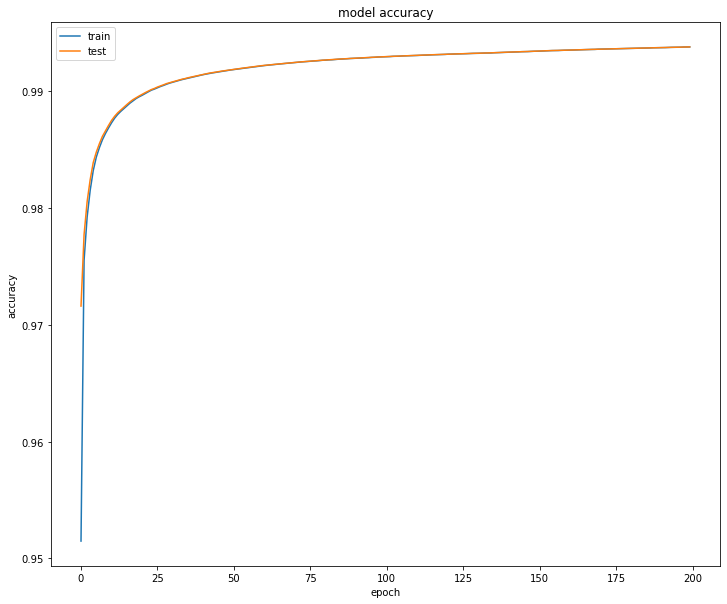

In [20]:
# summarize history for accuracy
plt.plot(exe.history['accuracy'])
plt.plot(exe.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

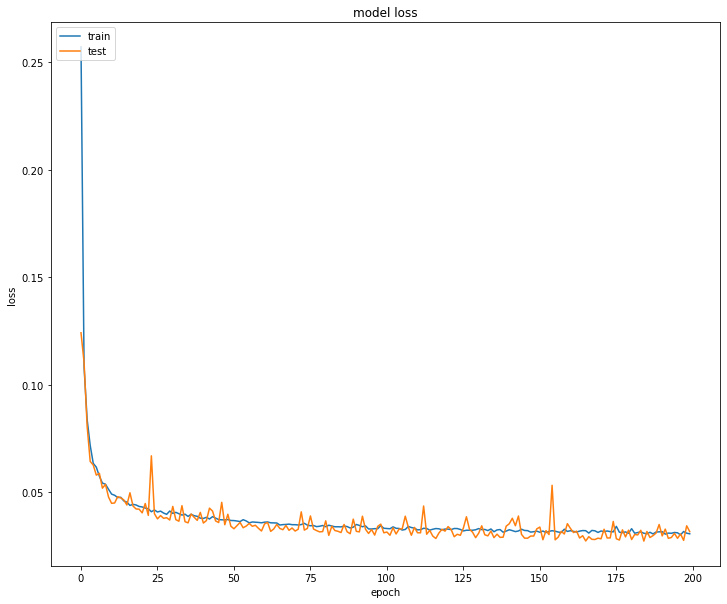

In [21]:
# summarize history for loss
plt.plot(exe.history['loss'])
plt.plot(exe.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
predictions = model.predict_classes(test_X)

In [23]:
results_test = model.evaluate(test_X, test_Y)
for i in range(0,len(results_test)):
    print((str(i)+': {:0.4f}').format(results_test[i]))

22544/22544 [==============================] - 1s 43us/step
0: 0.6951
1: 11693228.0000
2: 69302.7188
3: 13467132.0000
4: 94012.7891
5: 0.9937
6: 0.9941
7: 0.9920
8: 0.9996


In [24]:
def plot_metrics(history):
  metrics =  ['loss', 'accuracy', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'accuracy':
      plt.ylim([0.8,1])
    elif metric == 'precision':
      plt.ylim([0.8,1])
    elif metric == 'recall':
      plt.ylim([0.8,1])

    plt.legend()

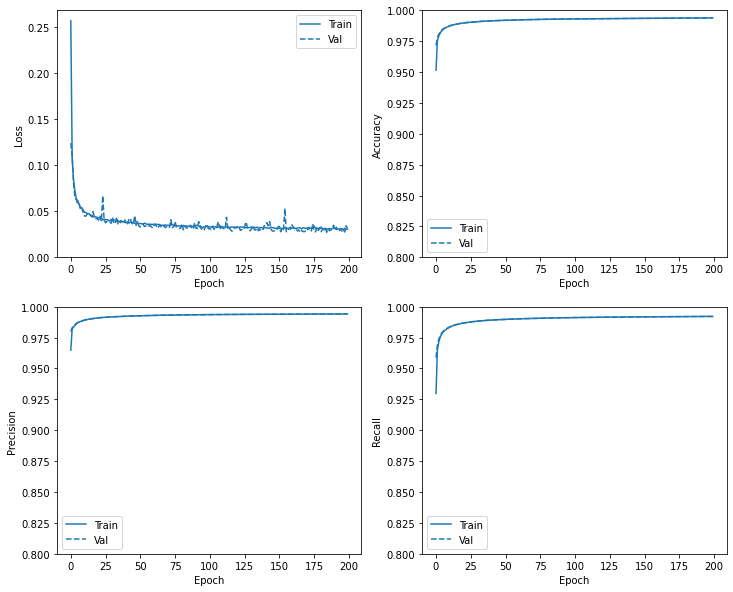

In [25]:
plot_metrics(exe)

In [39]:
test_predictions = model.predict(test_X)

In [42]:
def plot_cm(labels, predictions, p=0.83):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives : ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives : ', cm[1][1])

In [28]:
import seaborn as sns

True Negatives :  9469
False Positives:  242
False Negatives:  4435
True Positives :  8398
Total Transactions:  12833


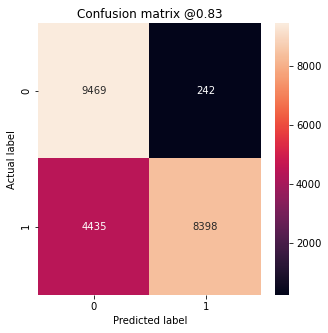

In [43]:
plot_cm(test_Y, test_predictions)

In [41]:
print(classification_report(test_Y, test_predictions.round()))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83      9711
           1       0.97      0.73      0.83     12833

    accuracy                           0.83     22544
   macro avg       0.85      0.85      0.83     22544
weighted avg       0.87      0.83      0.83     22544



In [27]:
count = 0
for i in range(0,22544):
    if predictions[i] != test_Y[i]:
        #print('%s => %d (expected %d)' % (test_X[i].tolist(), predictions[i], test_Y[i]))
        count = count + 1
print('Number of incorrect predictions = ',count)
print('Number of correct predictions   = ', (22544-count))
print('Test set accuracy               =  '+ str((16491/22544)*100) + '%')

Number of incorrect predictions =  5049
Number of correct predictions   =  17495
Test set accuracy               =  73.15028388928317%
